In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import json
import pprint
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append('../')
from map import Map
from optimizer import *
from tools import *

plt.rcParams['figure.figsize'] = [48, 32] # default is [6.0, 4.0], good value is [24, 16]
plt.rcParams['figure.dpi'] = 50 # default is 72, good value is 50

In [2]:
# Select data here
case = "brevent"

In [3]:
# Load data file
casedir = Path("../data/") / case
with open(casedir / "info.json") as info:
    data = json.load(info)

In [4]:
# Do not merge with another cell to benefit from the caching.  
def errorfun(point):
    return optimize_picture(point, data['xy'], [p[0] for p in data['projections']]).error

In [5]:
map = Map(casedir / data['map'], y_origin="bottom")

# Heatmap
map.hot_colorize(
    colorfun=errorfun,
    transfun=lambda x: 1000*x, # increase for bluer, decrease for whiter image
    incr=5, # Decrease this value (down to zero) to have more precision at the cost of longer computing time.
)

# Draw the summits on the map
for (p, name) in zip(data['xy'], "ABCDEFGHIKLMNOPQRSTUVWXYZ"):
    map.draw_point(p, name, color="red")

# Draw the known position of the photograper if available
if "photographer_xy" in data:
    map.draw_point(data["photographer_xy"], "Photographer", color="red")

# Draw the area where the photographer can be
area = photographer_area(data['xy'])
map.draw_area(area, color="red")

# Draw the init of the search
init = barycenter(area)
map.draw_point(init, "Init", color="red")

# Locate the photographer
photographer, error, path, area, init = find_photographer(
    summits=data['xy'],
    projections=[p[0] for p in data['projections']]
)

# Draw photographer & search path
map.draw_path(path, color="green")
map.draw_point(photographer, name="X", color="red")


1% 2% 3% 4% 5% 6% 7% 8% 9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99% 100% 
error min, max: 0.000014, 0.484782


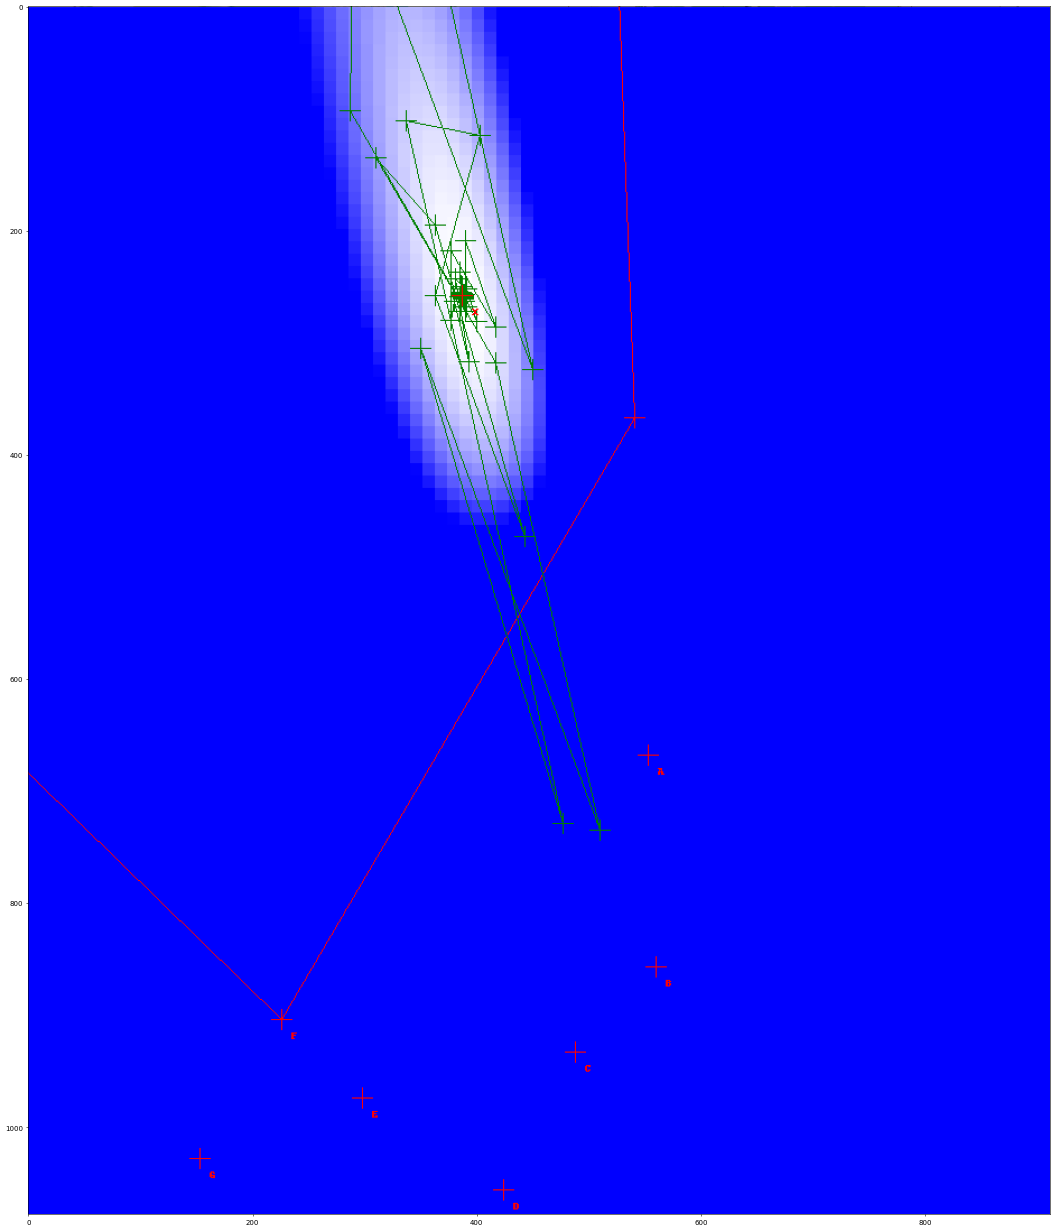

In [6]:
map.show()